<h1 align="center"> Machine Learning with scikit-learn </h1>

---------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\GitHub\Mypractice\Projects\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

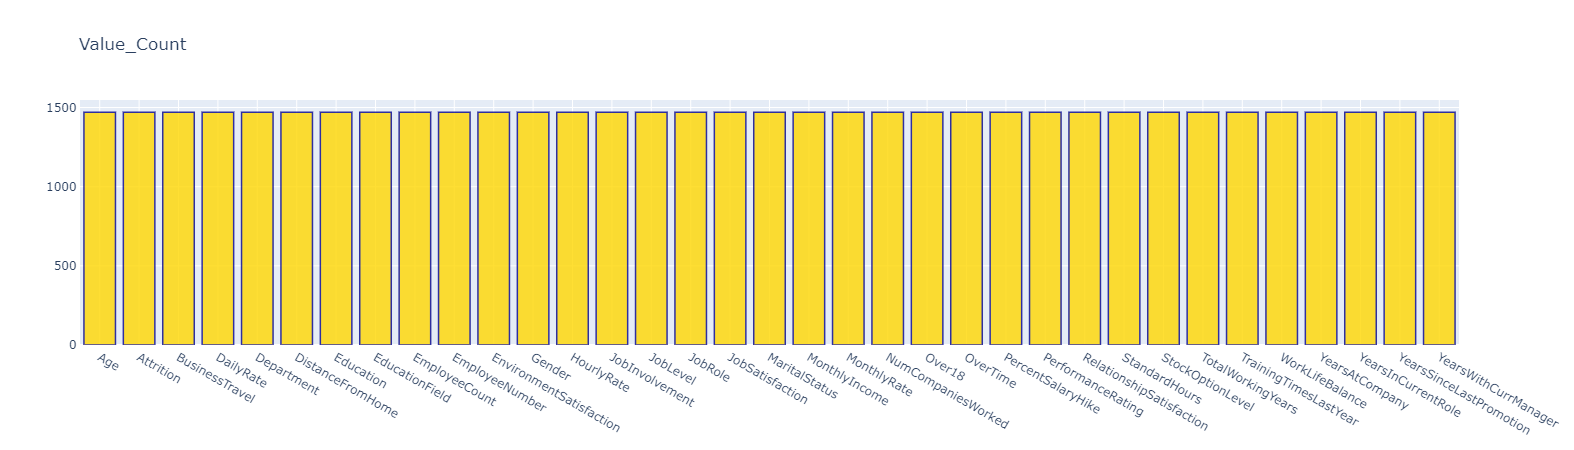

In [4]:

value_count = pd.DataFrame(len(df['Attrition']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = value_count.index, y = value_count['Count'] ,opacity = 0.8, marker=dict(color = 'gold', line=dict(color='darkblue',width=1.5)))

layout = dict(title = "Value_Count")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

([<matplotlib.patches.Wedge at 0x2776296eb08>,
 [Text(-1.0493363707830163, 0.5821453263163141, 'No'),
  Text(1.0493363707830163, -0.5821453263163142, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '84%'),
  Text(0.5246681853915082, -0.2910726631581571, '16%')])

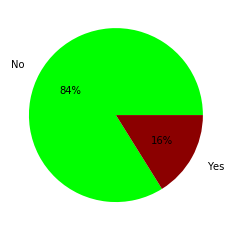

In [5]:
pie=df['Attrition'].value_counts()
plt.pie(pie,labels=pie.index,colors=('lime','darkred',),explode=(0,0), autopct='%1.0f%%',pctdistance=0.6, labeldistance=1.2)

In [6]:
map={'Yes':1,'No':0}
df['Attrition_class']=df['Attrition'].map(map)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_class
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [7]:
#numerical
dfn=df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
#categorical
dfc=df[['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]

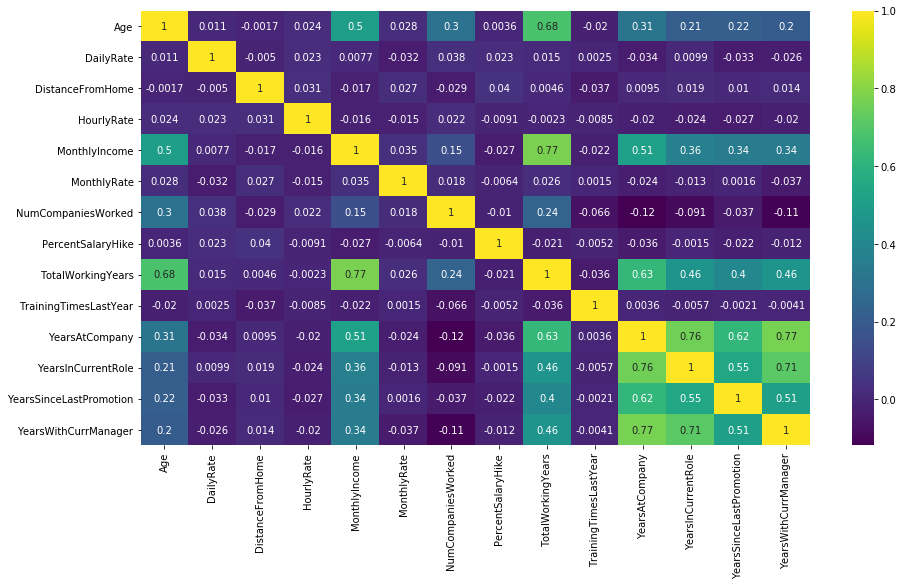

In [8]:
plt.figure(figsize =(15,8))
sns.heatmap(dfn.corr(),annot=True,cmap='viridis')
plt.show()

In [9]:
df_dummy=pd.get_dummies(dfc.astype(str))
df_dummy

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1466,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1467,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1468,0,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [10]:
df1=pd.concat([dfn, df_dummy], axis=1)
df1

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,94,5993,19479,8,11,8,0,...,0,0,1,0,0,0,1,0,0,0
1,49,279,8,61,5130,24907,1,23,10,3,...,0,1,0,1,0,0,0,0,1,0
2,37,1373,2,92,2090,2396,6,15,7,3,...,0,0,1,0,0,0,0,0,1,0
3,33,1392,3,56,2909,23159,1,11,8,3,...,1,0,1,0,0,0,0,0,1,0
4,27,591,2,40,3468,16632,9,12,6,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,4,17,17,3,...,1,0,0,1,0,0,0,0,1,0
1466,39,613,6,42,9991,21457,4,15,9,5,...,0,0,0,1,0,0,0,0,1,0
1467,27,155,4,87,6142,5174,1,20,6,0,...,0,0,0,1,0,0,0,0,1,0
1468,49,1023,2,63,5390,13243,2,14,17,3,...,0,1,1,0,0,0,0,1,0,0


In [11]:
X=df1
y=df['Attrition_class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [13]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
d_tree.score(X_test, y_test)

0.7857142857142857

In [14]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8537414965986394

In [15]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8843537414965986

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8163265306122449

In [17]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8401360544217688

In [18]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.transform(X_test)
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

In [19]:
d_tree1 = DecisionTreeClassifier()
d_tree1.fit(X_train_scaled1, y_train)
d_tree1.score(X_test_scaled1, y_test)

0.782312925170068

In [20]:
d_tree2 = DecisionTreeClassifier()
d_tree2.fit(X_train_scaled2, y_train)
d_tree2.score(X_test_scaled2, y_test)

0.7687074829931972

In [21]:
rf1 = RandomForestClassifier(n_estimators=10)
rf1.fit(X_train_scaled1, y_train)
rf1.score(X_test_scaled1, y_test)

0.8469387755102041

In [22]:
rf2 = RandomForestClassifier(n_estimators=10)
rf2.fit(X_train_scaled2, y_train)
rf2.score(X_test_scaled2, y_test)

0.8469387755102041

In [23]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(X_train_scaled1, y_train)
lr1.score(X_test_scaled1, y_test)

0.8877551020408163

In [24]:
lr2 = LogisticRegression(max_iter=10000)
lr2.fit(X_train_scaled2, y_train)
lr2.score(X_test_scaled2, y_test)

0.8843537414965986

In [25]:
knn1 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn1.fit(X_train_scaled1, y_train)
knn1.score(X_test_scaled1, y_test)

0.8707482993197279

In [26]:
knn2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn2.fit(X_train_scaled2, y_train)
knn2.score(X_test_scaled2, y_test)

0.8537414965986394

In [27]:
svm1 = SVC()
svm1.fit(X_train_scaled1, y_train)
svm1.score(X_test_scaled1, y_test)

0.8843537414965986

In [28]:
svm2 = SVC()
svm2.fit(X_train_scaled2, y_train)
svm2.score(X_test_scaled2, y_test)

0.8843537414965986

In [29]:
sm = SMOTE(random_state=18)
x_train_res3, y_train_res3 = sm.fit_resample(X_train, y_train)
x_train_res4, y_train_res4 = sm.fit_resample(X_train_scaled1, y_train)
x_train_res5, y_train_res5 = sm.fit_resample(X_train_scaled2, y_train)

In [30]:
d_tree3 = DecisionTreeClassifier()
d_tree3.fit(x_train_res3, y_train_res3)
d_tree3.score(X_test, y_test)

0.7857142857142857

In [31]:
d_tree4 = DecisionTreeClassifier()
d_tree4.fit(x_train_res4, y_train_res4)
d_tree4.score(X_test_scaled1, y_test)

0.7687074829931972

In [32]:
d_tree5 = DecisionTreeClassifier()
d_tree5.fit(x_train_res5, y_train_res5)
d_tree5.score(X_test_scaled2, y_test)

0.7959183673469388

In [33]:
rf3 = RandomForestClassifier(n_estimators=10)
rf3.fit(x_train_res3, y_train_res3)
rf3.score(X_test, y_test)

0.8605442176870748

In [34]:
rf4 = RandomForestClassifier(n_estimators=10)
rf4.fit(x_train_res4, y_train_res4)
rf4.score(X_test_scaled1, y_test)

0.8537414965986394

In [35]:
rf5 = RandomForestClassifier(n_estimators=10)
rf5.fit(x_train_res5, y_train_res5)
rf5.score(X_test_scaled2, y_test)

0.8571428571428571

In [36]:
lr3 = LogisticRegression(max_iter=10000)
lr3.fit(x_train_res3, y_train_res3)
lr3.score(X_test, y_test)

0.8571428571428571

In [37]:
lr4 = LogisticRegression(max_iter=10000)
lr4.fit(x_train_res4, y_train_res4)
lr4.score(X_test_scaled1, y_test)

0.8231292517006803

In [38]:
lr5 = LogisticRegression(max_iter=10000)
lr5.fit(x_train_res5, y_train_res5)
lr5.score(X_test_scaled2, y_test)

0.8367346938775511

In [39]:
knn3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn3.fit(x_train_res3, y_train_res3)
knn3.score(X_test, y_test)

0.6632653061224489

In [40]:
knn4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn4.fit(x_train_res4, y_train_res4)
knn4.score(X_test_scaled1, y_test)

0.6326530612244898

In [41]:
knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn5.fit(x_train_res5, y_train_res5)
knn5.score(X_test_scaled2, y_test)

0.5952380952380952

In [42]:
svm3 = SVC()
svm3.fit(x_train_res3, y_train_res3)
svm3.score(X_test, y_test)

0.5306122448979592

In [43]:
svm4 = SVC()
svm4.fit(x_train_res4, y_train_res4)
svm4.score(X_test_scaled1, y_test)

0.8843537414965986

In [44]:
svm5 = SVC()
svm5.fit(x_train_res5, y_train_res5)
svm5.score(X_test_scaled2, y_test)

0.8877551020408163

In [45]:
lr1.coef_

array([[-1.20404489, -0.50507406,  1.26898933,  0.25910389, -1.3277311 ,
         0.53227042,  1.54394249, -0.14898405, -0.50449602, -0.65935195,
         0.6513734 , -0.92901051,  1.57912501, -0.81516947, -0.8804027 ,
         0.94925314, -0.06926434,  0.00203357, -0.51664014,  0.51419267,
        -0.02492569,  0.14788601,  0.05770408,  0.18584625, -0.36692455,
         0.12505876, -0.24606938,  0.09416942, -0.35262209, -0.35609464,
         0.73514403,  0.86476156, -0.0694985 , -0.3838386 , -0.41183837,
        -0.16812876,  0.16771486,  1.12649484, -0.01586583, -0.29950085,
        -0.81154205,  0.83666486, -0.72251825,  0.2801312 , -0.60564589,
         0.21095417,  0.63980991, -0.03312042, -0.05029708, -0.55680632,
        -0.07521217, -0.02640947,  0.10120774, -0.94398067,  0.94356677,
        -0.02259587,  0.02218197,  0.55408667, -0.24034296, -0.13691414,
        -0.17724346,  0.66074241, -0.5184315 , -0.40952281,  0.26679799,
         0.73292508, -0.07915323, -0.50545449, -0.1

In [46]:
feature_importance = abs(lr1.coef_)
print(feature_importance)

[[1.20404489 0.50507406 1.26898933 0.25910389 1.3277311  0.53227042
  1.54394249 0.14898405 0.50449602 0.65935195 0.6513734  0.92901051
  1.57912501 0.81516947 0.8804027  0.94925314 0.06926434 0.00203357
  0.51664014 0.51419267 0.02492569 0.14788601 0.05770408 0.18584625
  0.36692455 0.12505876 0.24606938 0.09416942 0.35262209 0.35609464
  0.73514403 0.86476156 0.0694985  0.3838386  0.41183837 0.16812876
  0.16771486 1.12649484 0.01586583 0.29950085 0.81154205 0.83666486
  0.72251825 0.2801312  0.60564589 0.21095417 0.63980991 0.03312042
  0.05029708 0.55680632 0.07521217 0.02640947 0.10120774 0.94398067
  0.94356677 0.02259587 0.02218197 0.55408667 0.24034296 0.13691414
  0.17724346 0.66074241 0.5184315  0.40952281 0.26679799 0.73292508
  0.07915323 0.50545449 0.14873126]]


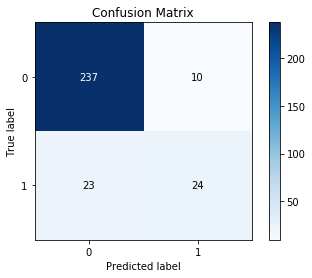

In [47]:
y_pred = lr1.predict(X_test_scaled1)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       247
           1       0.71      0.51      0.59        47

    accuracy                           0.89       294
   macro avg       0.81      0.74      0.76       294
weighted avg       0.88      0.89      0.88       294



In [49]:
pipeline = Pipeline([('transformer', scaler1), ('estimator', lr1)])
cv = KFold(n_splits=10)
scores=cross_val_score(pipeline, X, y, cv = cv)

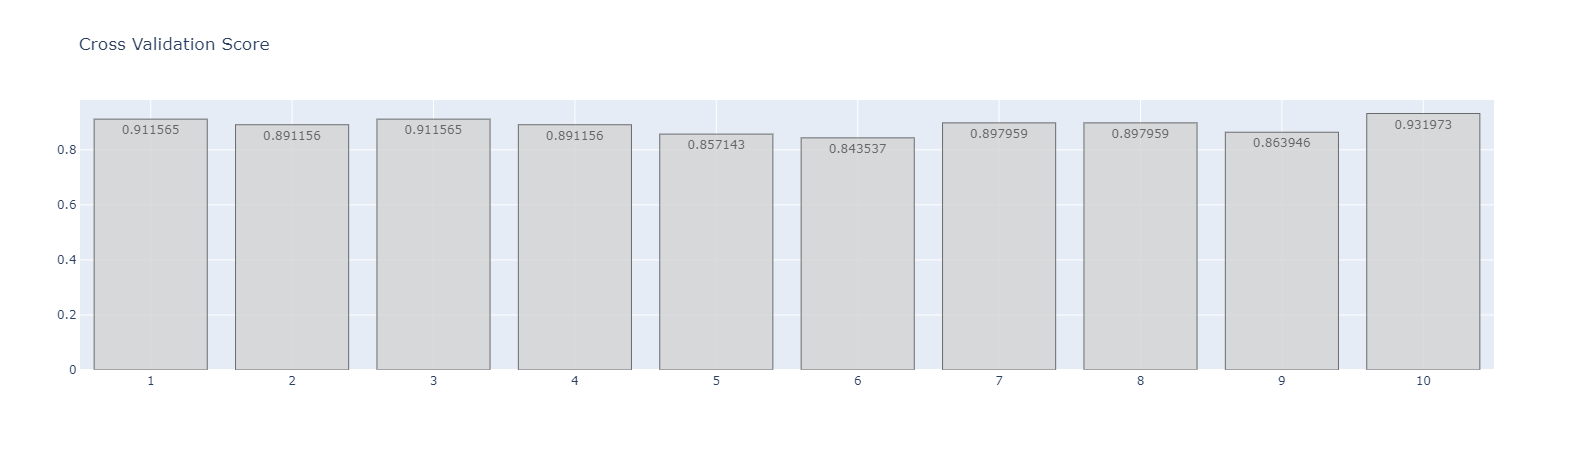

In [50]:
trace = go.Bar(y = scores, x = list(range(1,11)), orientation = 'v',opacity = 0.8, text=scores.round(6), textposition='inside',width=0.8,marker=dict(color = 'lightgrey', line=dict(color='black',width=0.5)))

layout = dict(title = "Cross Validation Score", xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1))
                    
fig = dict(data = [trace], layout=layout)

py.iplot(fig)

In [51]:
scores.std()

0.025957529290257034

In [52]:
scores.mean()

0.889795918367347

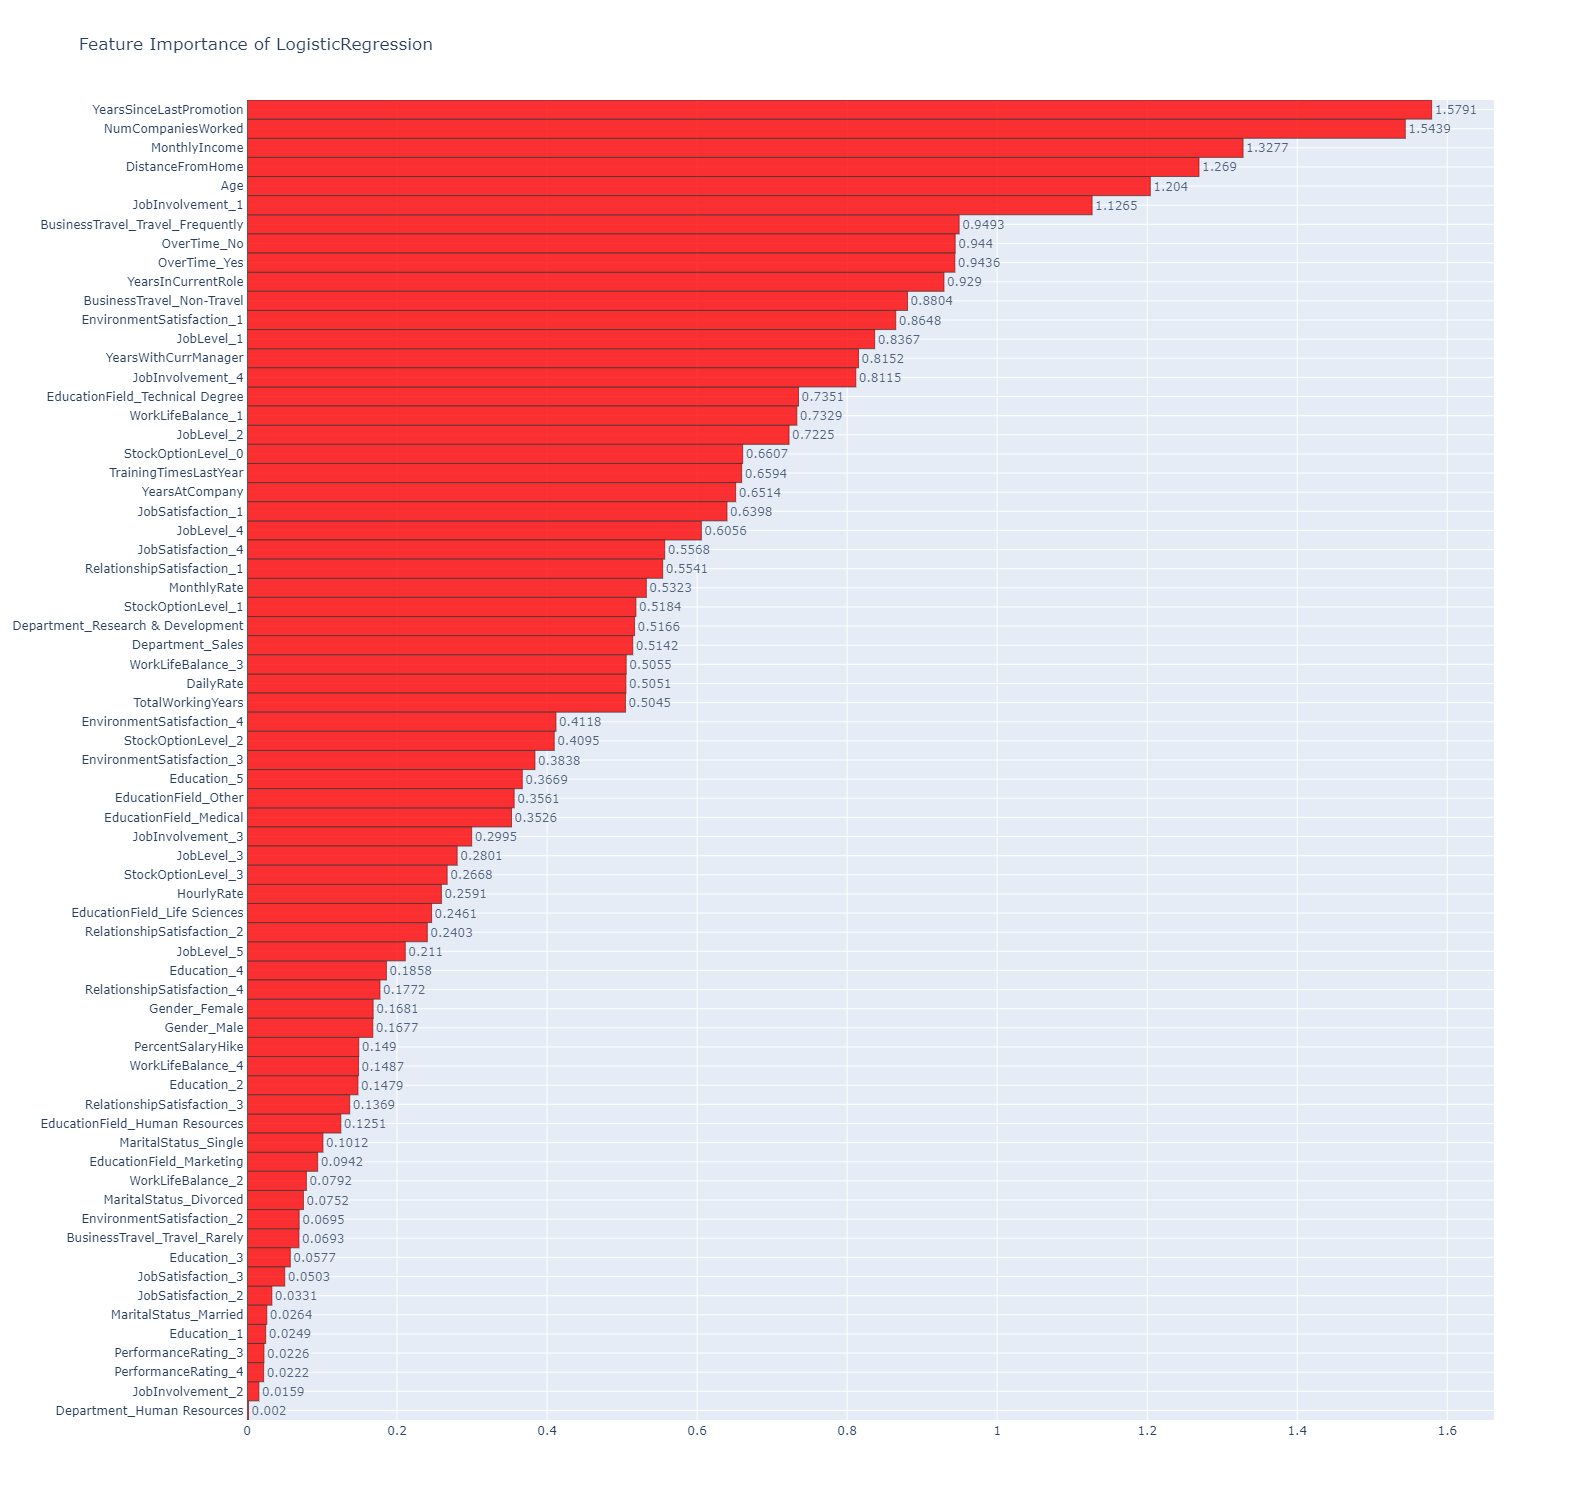

In [53]:
feature_importance = np.abs(lr1.coef_[0])

trace = go.Bar(y = df1.columns, x = feature_importance, orientation = 'h',opacity = 0.8, text=feature_importance.round(4), textposition='outside',width=1,marker=dict(color = 'red', line=dict(color='black',width=0.5)))

layout = dict(autosize=False, width=1100, height=1500,title = "Feature Importance of LogisticRegression", yaxis={'categoryorder':'total ascending', 'automargin':True})
                    
fig = dict(data = [trace], layout=layout)

py.iplot(fig)